<a href="https://colab.research.google.com/github/divyansh351/ML-Bootcamp-WOC/blob/main/LinRegGradDes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**
Gradient Descent Model

### ***Importing necessary libraries***

### ***Mounting Google drive to read data***

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/cyberlabs/linear_data
train_path = '/content/drive/MyDrive/cyberlabs/linear_data/Linear_train.csv'
test_path = '/content/drive/MyDrive/cyberlabs/linear_data/Linear_test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

/content/drive/MyDrive/cyberlabs/linear_data


*Dropping the unnecessary columns from the dataset*

In [3]:
train = df_train.drop(["Unnamed: 0"], axis = 1)
test = df_test.drop(["Unnamed: 0"], axis = 1)

### ***Normalizing the dataset***

Normalizing helps the gradient discend to converge at a much faster rate with lesser number of iterations and a reasonable learning rate

In [4]:
def normalizeData(dataFrame):
    return (dataFrame - np.min(dataFrame)) / (np.max(dataFrame) - np.min(dataFrame))

In [5]:
train = normalizeData(train)
test = normalizeData(test)

### ***Separating Fabels and Features***

In [6]:
trainData = train.values
Y = trainData[:, -1].reshape(trainData.shape[0], 1)
X = trainData[:, :-1]

testData = test.values
Y_test = testData[:, -1].reshape(testData.shape[0], 1)
X_test = testData[:, :-1]

print("Dimensions of Training and Testing Datasets")
print("X_train :", X.shape)
print("Y_train :", Y.shape)
print("X_test :", X_test.shape)
print("Y_test :", Y_test.shape)

Dimensions of Training and Testing Datasets
X_train : (50000, 20)
Y_train : (50000, 1)
X_test : (10000, 20)
Y_test : (10000, 1)


### ***Adding a set of bias features in the first column of the dataset***

In [7]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

### ***Defining gradient descent function for the model***

In [8]:
def GradDes(X, Y, alpha, iter):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  costList = []
  for i in range(iter):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - alpha*d_theta
    costList.append(cost)
    if(i%(iter/10) == 0):
      print("Cost after", i, "iterations:", cost)
      
  return theta, costList

### ***Using the function to get the cost***

In [9]:
iter = 1000
alpha = 0.3
theta, costList = GradDes(X, Y, alpha = alpha, iter = iter)

Cost after 0 iterations: 0.13368343512225278
Cost after 100 iterations: 6.890296725690669e-05
Cost after 200 iterations: 5.291807630850126e-06
Cost after 300 iterations: 2.921119143324872e-06
Cost after 400 iterations: 2.071322853913808e-06
Cost after 500 iterations: 1.6943204828656143e-06
Cost after 600 iterations: 1.526314341967607e-06
Cost after 700 iterations: 1.4514379908938024e-06
Cost after 800 iterations: 1.4180673174610233e-06
Cost after 900 iterations: 1.4031947726392637e-06


*Here we observe that the cost has almost stopped to decrease after 1000 iterations, this suggests that the model is working fine and will give a fairly accurate prediction.*

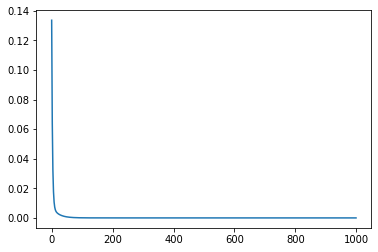

In [10]:
rng = np.arange(0, iter)
plt.plot(rng, costList)
plt.show()

### ***The normalized weights of the different features are listed below***

In [11]:
theta

array([[ 0.13108643],
       [ 0.03684529],
       [ 0.00547706],
       [-0.07289112],
       [ 0.02180088],
       [ 0.10005218],
       [ 0.00821187],
       [ 0.05138782],
       [-0.08192398],
       [ 0.00331829],
       [ 0.06519795],
       [ 0.08417674],
       [ 0.00816037],
       [-0.24569993],
       [ 0.0919302 ],
       [ 0.12762954],
       [ 0.13786239],
       [ 0.06491502],
       [-0.00265208],
       [ 0.2684792 ],
       [ 0.0678712 ]])

### ***Using the weights to predict the normalized test dataset***

In [12]:
y_pred = np.dot(X_test, theta)

In [13]:
Y_test

array([[0.45927488],
       [0.64466997],
       [0.53059033],
       ...,
       [0.42467654],
       [0.51883764],
       [0.29316227]])

In [14]:
y_pred

array([[0.45297171],
       [0.63703413],
       [0.51583027],
       ...,
       [0.41413165],
       [0.50463644],
       [0.28890545]])

### ***Calculating the accuracy of the model***

In [15]:
def meanAbsoluteError(actual, predicted):
  return sum(actual - predicted)/len(actual)

In [16]:
def meanSquaredError(actual, predicted):
  return sum(np.square(actual - predicted))/len(actual)

In [17]:
def rootMeanSquaredError(actual, predicted):
  return math.sqrt(meanSquaredError(actual, predicted))

In [18]:
def r2Score(actual, predicted):
  return 1 - sum(np.square(actual - predicted))/sum(np.square(actual - np.mean(actual)))

In [19]:
MAE = meanAbsoluteError(Y_test, y_pred)
MSE = meanSquaredError(Y_test, y_pred)
RMSE = rootMeanSquaredError(Y_test, y_pred)
R2S = r2Score(Y_test, y_pred)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R2 Score:", R2S)

Mean Absolute Error: [0.00703598]
Mean Squared Error: [6.13707907e-05]
Root Mean Squared Error: 0.007833951155537535
R2 Score: [0.99673894]
